In [17]:
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt

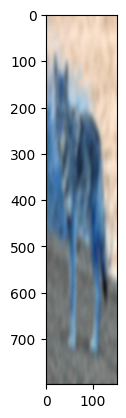

In [18]:
img = cv.imread('image.jpg')
plt.imshow(img)

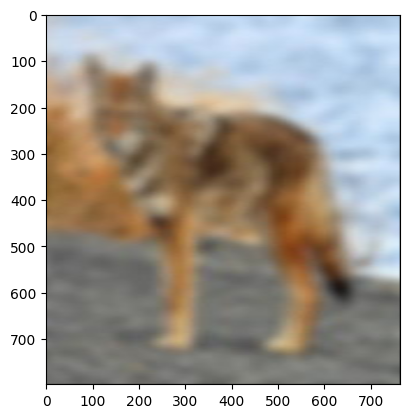

In [19]:
# https://ru.stackoverflow.com/questions/141.55335/python-%D0%B8%D0%B7%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D0%BE%D1%80%D0%BC%D1%8B-%D0%BA%D0%B0%D1%80%D1%81.5%D0%B8%D0%BD%D0%BA%D0%B8

# получить форму изображения
(h, w, d) = img.shape
# сдвиг, примененный к оси x
M = np.float32([ [5, 0, 0],
                [0, 1, 0],
                [0, 0  , 1] ])
# сдвиг, примененный к оси Y
# M = np.float32([ [1,   0, 0],
#                 [0.5, 1, 0],
#                 [0,   0, 1] ])
# применяем перспективное преобразование к изображению
img = cv.warpPerspective(img,M,(w * 5,h))
#Преобразуем изображение в rgb
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

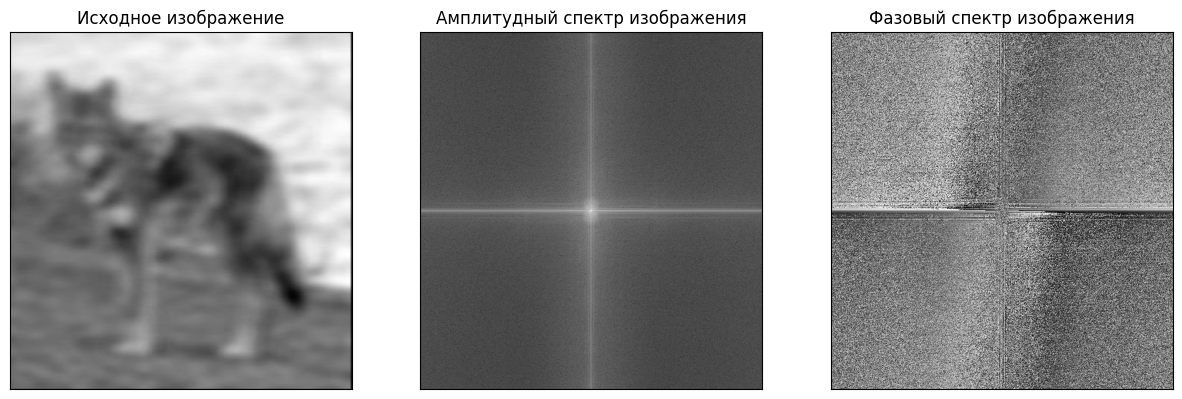

In [20]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
f = np.fft.fft2(gray_img)
fshift = np.complex64(np.fft.fftshift(f))
magnitude_spectrum = 20 * np.log(np.abs(fshift))
phase_spectrum = np.uint8(255 * (np.angle(fshift) + np.pi) / (2 * np.pi))

# вывод
plt.figure(figsize=(15, 12))
plt.subplot(131), plt.imshow(gray_img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Амплитудный спектр изображения'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Фазовый спектр изображения'), plt.xticks([]), plt.yticks([])
plt.show()


/tmp/ipykernel_6729/115834300.py:20: RuntimeWarning: divide by zero encountered in log
  magnitude_dft_shift_masked = 20 * np.log(


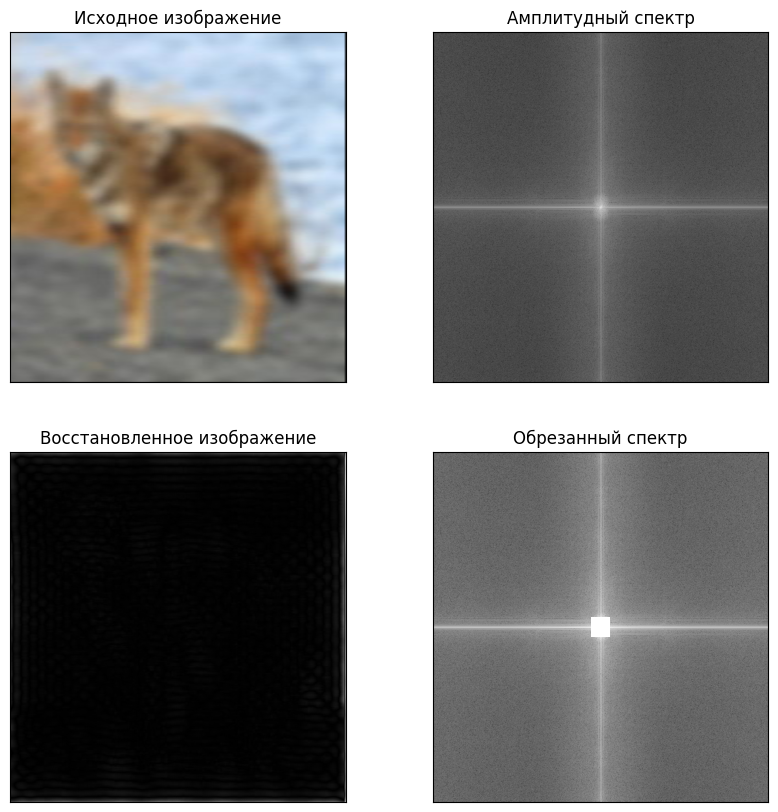

In [21]:

r = 20
rows, cols = gray_img.shape
crow, ccol = np.uint32((rows / 2, cols / 2))
# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

# вычисляем фурье-образ
dft = cv.dft(np.float32(gray_img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# применяем маску и делаем обратное преобразование Фурье
dft_shift_masked = dft_shift * mask
f_ishift = np.fft.ifftshift(dft_shift_masked)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[..., 0], img_back[..., 1])

magnitude_dft_shift = 20 * np.log(
    cv.magnitude(dft_shift[..., 0], dft_shift[..., 1]))
magnitude_dft_shift_masked = 20 * np.log(
    cv.magnitude(dft_shift_masked[..., 0], dft_shift_masked[..., 1]))

# вывод
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitude_dft_shift, cmap='gray')
plt.title('Амплитудный спектр'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_back, cmap='gray')
plt.title('Восстановленное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(magnitude_dft_shift_masked, cmap='gray')
plt.title('Обрезанный спектр'), plt.xticks([]), plt.yticks([])
plt.show()


Text(0.5, 1.0, 'Reconstructed Image')

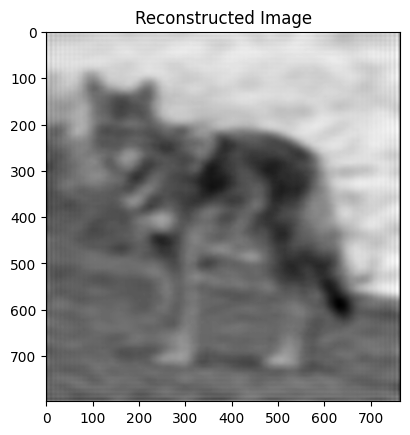

In [25]:
from scipy import fftpack
im_fft = fftpack.fft2(gray_img)


# 
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r = im_fft2.shape[0]
c = im_fft2.shape[1]


# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')